In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
data = pd.read_csv(r"D:\Data Mining\Data sets for lab report\Food Delivery\Food_Delivery_Times.csv")

In [65]:
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [67]:
data.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [85]:
data.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [169]:
# Step 1: Handle Missing Values
data['Weather'].fillna(data['Weather'].mode()[0], inplace=True)
data['Traffic_Level'].fillna(data['Traffic_Level'].mode()[0], inplace=True)
data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0], inplace=True)
data['Courier_Experience_yrs'].fillna(data['Courier_Experience_yrs'].median(), inplace=True)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   float64
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [173]:
data.isna().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [175]:
data.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,0.488143,0.49925,0.510222,0.336083
std,288.819436,0.293642,0.30019,0.319022,0.152213
min,1.000000,0.000000,0.00000,0.000000,0.000000
25%,250.750000,0.232732,0.25000,0.222222,0.227586
50%,500.500000,0.494845,0.50000,0.555556,0.327586
75%,750.250000,0.743686,0.75000,0.777778,0.434483
max,1000.000000,1.000000,1.00000,1.000000,1.000000


In [177]:
# Step 3: Data Normalization
scaler = MinMaxScaler()
numerical_columns = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [179]:
data.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,0.488143,0.49925,0.510222,0.336083
std,288.819436,0.293642,0.30019,0.319022,0.152213
min,1.000000,0.000000,0.00000,0.000000,0.000000
25%,250.750000,0.232732,0.25000,0.222222,0.227586
50%,500.500000,0.494845,0.50000,0.555556,0.327586
75%,750.250000,0.743686,0.75000,0.777778,0.434483
max,1000.000000,1.000000,1.00000,1.000000,1.000000


In [181]:
df= data.copy()

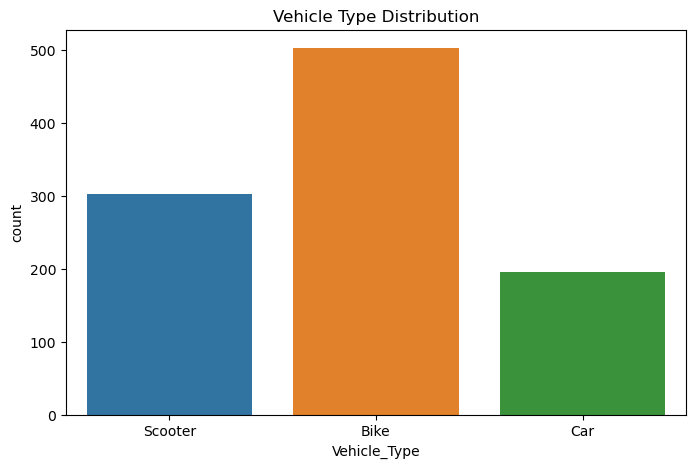

In [183]:
# Bar Plot for categorical data (Vehicle_Type)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Vehicle_Type')
plt.title('Vehicle Type Distribution')
plt.show()

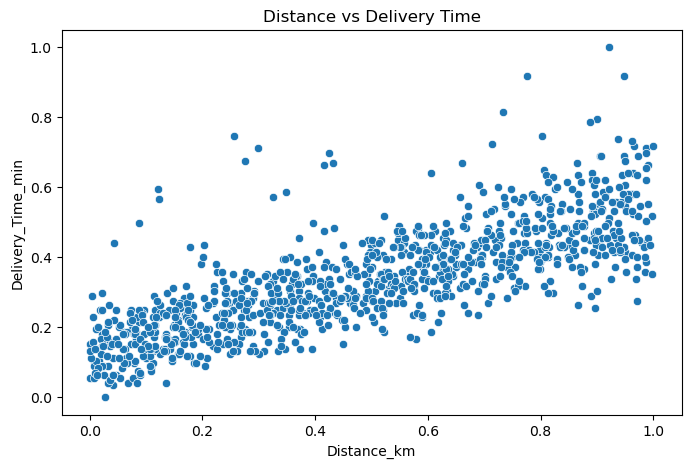

In [185]:
# Scatter Plot to visualize relationships between Distance_km and Delivery_Time_min
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Distance_km', y='Delivery_Time_min')
plt.title('Distance vs Delivery Time')
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


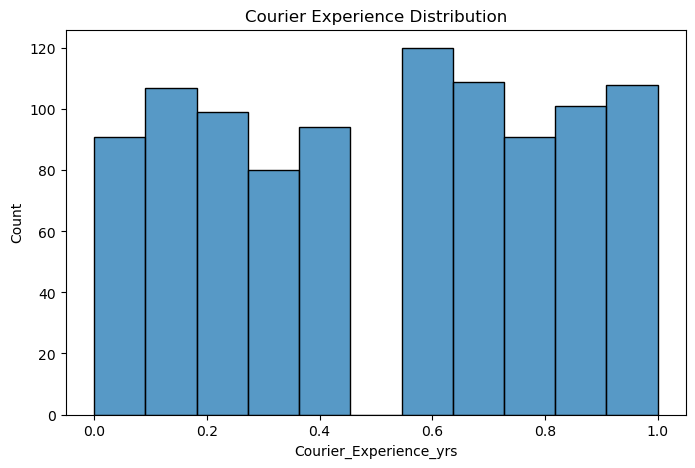

In [187]:
# Histogram for numerical data (Courier_Experience_yrs)
plt.figure(figsize=(8, 5))
sns.histplot(df['Courier_Experience_yrs'])
plt.title('Courier Experience Distribution')
plt.show()

In [189]:
# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_cols)

# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Order_ID', 'Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
Categorical Columns: ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']


In [191]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the normalized data
print(df.head())

   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0  0.521522     0.378351   Windy           Low   Afternoon      Scooter   
1  0.737738     0.815979   Clear        Medium     Evening         Bike   
2  0.740741     0.460309   Foggy           Low       Night      Scooter   
3  0.660661     0.353093   Rainy        Medium   Afternoon      Scooter   
4  0.411411     0.950515   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0              0.291667                0.111111           0.241379  
1              0.625000                0.222222           0.524138  
2              0.958333                0.111111           0.351724  
3              0.000000                0.111111           0.200000  
4              0.458333                0.555556           0.413793  


In [193]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.500000,0.488143,0.49925,0.510222,0.336083
std,0.289109,0.293642,0.30019,0.319022,0.152213
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.250000,0.232732,0.25000,0.222222,0.227586
50%,0.500000,0.494845,0.50000,0.555556,0.327586
75%,0.750000,0.743686,0.75000,0.777778,0.434483
max,1.000000,1.000000,1.00000,1.000000,1.000000


In [195]:
# Step 2: Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()

# Specify columns that need to be label-encoded (assuming 'Traffic_Level' is ordinal)
df['Traffic_Level'] = label_encoder.fit_transform(df['Traffic_Level'])
df['Weather'] = label_encoder.fit_transform(df['Weather'])
df['Time_of_Day'] = label_encoder.fit_transform(df['Time_of_Day'])
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])

In [197]:
# Select features (X) and target (y)
X = df.drop('Delivery_Time_min', axis=1)  # Features: all columns except 'Delivery_Time_min'
y = df['Delivery_Time_min']  # Target: Delivery_Time_min

In [199]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (800, 8)
Testing data shape: (200, 8)


In [201]:
X_train.isna().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
dtype: int64

In [203]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [205]:
# Predict on the test data
y_pred = model.predict(X_test)

In [207]:
y_pred

array([0.22125466, 0.38841427, 0.2087335 , 0.23419074, 0.5373592 ,
       0.18757399, 0.38165739, 0.191143  , 0.14971141, 0.43145735,
       0.42785552, 0.39550317, 0.15869905, 0.42220427, 0.55270371,
       0.58289192, 0.15299898, 0.41245965, 0.25024028, 0.34767378,
       0.50911732, 0.12821767, 0.48352665, 0.45599329, 0.33637396,
       0.15763119, 0.50066605, 0.10568658, 0.27364622, 0.37580429,
       0.37010464, 0.10716027, 0.37416131, 0.23093379, 0.45524765,
       0.06865386, 0.42027779, 0.31028299, 0.26234322, 0.44524736,
       0.45424846, 0.20428765, 0.47291329, 0.39187367, 0.19976444,
       0.09087006, 0.57291785, 0.55890328, 0.51496344, 0.16700195,
       0.34574923, 0.37771843, 0.24536064, 0.45636592, 0.29850355,
       0.30871298, 0.42571087, 0.46312828, 0.38306173, 0.54686132,
       0.28898789, 0.25842353, 0.23969138, 0.30818681, 0.28038726,
       0.40019821, 0.41628913, 0.55500398, 0.41998982, 0.31421991,
       0.45813898, 0.1696526 , 0.56584065, 0.1537307 , 0.38178

In [209]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.005195712857797133


In [211]:
model.coef_

array([-0.00436854,  0.40328334,  0.01003191, -0.01220179, -0.0017349 ,
       -0.0019145 ,  0.1612406 , -0.04177285])

In [213]:
model.intercept_

0.08949836020235613

In [215]:
r2_score = r2_score(y_pred, y_test)

In [217]:
r2_score

0.6923302393818526

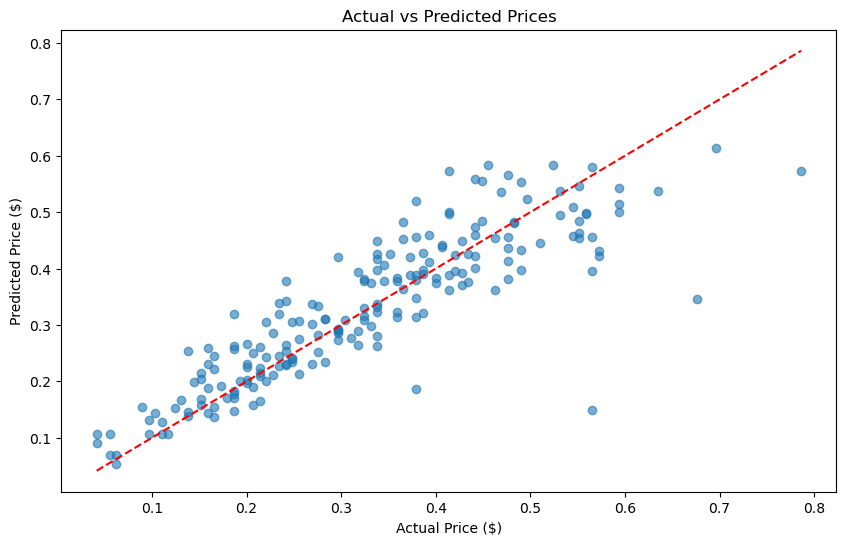

In [221]:
# Scatter Plot: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.show()